# SETUP FOR ENERGY EFFICIENCY CONTOUR PLOT

In [13]:
import matplotlib.pyplot as plt
import numpy as np 
import cmath
import random
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d.art3d as art3d

from Functions import *

# GENERAL SETUP

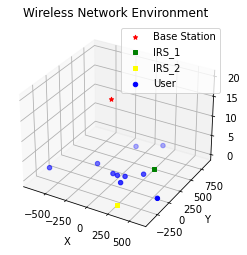

In [15]:
#============== System parameters
Nt = 1
K = 10
# gamma = db2pow(20)
f = 2.4e9
c = 3e8
Lambda = c/f
halfLambda = 0.5*Lambda
quarterLambda = 0.25*Lambda
BW = 20e6
NF = 10
noise = -133 # -174+10*np.log10(BW) + NF

GRID_RADIUS = 1000
GRID_RADIUS_HALF = GRID_RADIUS/2
BASE_STATION_POSITION = (0, 0, 20)
TRANSMIT_POWER_WATTS = 0.1 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
# FADING_STD_DEV = 3
PATH_LOSS_EXPONENT = 2.2 #path loss exponent (direct)
BETA = 3.8 #path loss exponent (indirect)
ZETA = 3.8
m = 1
omega = np.sqrt(0.5)

IRS_POSITION_1 = (300, 400, 10)
IRS_POSITION_2 = (300, -400, 10)

# Power consumption params
wn = 0.5
# Pt = 10 * np.log10(TRANSMIT_POWER_WATTS) + 30 # in dBm
Pb = 10 # in dBw
Pu = 10 # 10 in dBm
# Pt = 10 * np.log10(TRANSMIT_POWER_WATTS) + 30 # in dBm
# Pb = 10 # in dBw
# Pu = 10 # in dBm

# Generate user positions
user_positions = generate_user_positions_3D(K, GRID_RADIUS)
loc_U = user_positions
# print(loc_U)

# Generate antennas position
AP_position = generate_station_positions_3D(BASE_STATION_POSITION)
xt, yt, zt = AP_position[0]

# Generate IRS position_1
irs_position_1 = generate_IRS_3D(IRS_POSITION_1)
xs_1, ys_1, zs_1 = irs_position_1[0]

# Generate IRS position_2
irs_position_2 = generate_IRS_3D(IRS_POSITION_2)
xs_2, ys_2, zs_2 = irs_position_2[0]

tx_ant_coords = generate_transmit_antenna_coordinates_3D(Nt, xt, yt, zt, halfLambda, quarterLambda)
loc_T = tx_ant_coords

# Plot the 3D grid, base station, IRS, and user positions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xt, yt, zt, color='red', marker='*', label='Base Station')
plt.scatter(IRS_POSITION_1[0], IRS_POSITION_1[1], IRS_POSITION_1[2], color='green', marker='s', label='IRS_1')
plt.scatter(IRS_POSITION_2[0], IRS_POSITION_2[1], IRS_POSITION_2[2],color='yellow', marker='s', label='IRS_2')
ax.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o', label='User')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Wireless Network Environment')
ax.legend()
ax.grid(True)

# # Draw the circle in the x-y plane
# circle = plt.Circle((xt, yt), (GRID_RADIUS), edgecolor='black', facecolor='none')
# ax.add_patch(circle)
# art3d.pathpatch_2d_to_3d(circle, z=0, zdir='z')  # Add the circle to the x-y plane at z=zt
# plt.show()

In [16]:
h_dk_3d = []
h_rk_3d = []
h_rk_transpose_3d = []
G_3d = []
h_dk_2_3d = []  
h_rk_2_3d = [] 
h_rk_transpose_2_3d = []  
G_2_3d = []  

NUM_SIMULATIONS = 100
Ns_max = 289

# Perform simulations
for i in range(NUM_SIMULATIONS):

    # Generate the Rayleigh Fading Channel for each user (h_dk)
    h_dk1 = []
    fading1 = []
    for user in range(K):
        fading1.append(generate_rayleigh_fading_channel(Nt, FADING_STD_MEAN, FADING_STD_DEV))
    h_dk1 = np.array(fading1)
    h_dk1 = h_dk1.reshape(Nt,K)
    h_dk_3d.append(h_dk1)
    
    # Generate the Nakagami Channel from each user to the IRS (h_rk)
    h_rk1 = []
    fading2 = []
    for user in range(K):
        fading2.append(generate_nakagami_samples(m, omega, Ns_max))
    h_rk1 = np.array(fading2)
    h_rk1 = h_rk1.reshape(Ns_max,K)
    h_rk_3d.append(h_rk1)
    
    h_rk_conj1 = np.conj(h_rk1)
    h_rk_transpose1 = np.transpose(h_rk_conj1)
    h_rk_transpose_3d.append(h_rk_transpose1)
    
    # Generate the Nakagami Channel from base_station to the IRS (G)
    G1 = []
    fading3 = []
    for element in range(Ns_max):
        fading3.append(generate_nakagami_samples(m, omega, Nt))
    G1 = np.array(fading3)
    G_3d.append(G1)

    # # Generate the Rayleigh Fading Channel for each user (h_dk)
    # h_dk2 = []
    # fading4 = []
    # for user in range(K):
    #     fading4.append(generate_rayleigh_fading_channel(Nt, FADING_STD_MEAN, FADING_STD_DEV))
    # h_dk2 = np.array(fading4)
    # h_dk2 = h_dk2.reshape(Nt, K)
    # h_dk_2_3d.append(h_dk2)

    # Generate the Nakagami Channel from each user to the IRS (h_rk)
    h_rk2 = []
    fading5 = []
    for user in range(K):
        fading5.append(generate_nakagami_samples(m, omega, Ns_max))
    h_rk2 = np.array(fading5)
    h_rk2 = h_rk2.reshape(Ns_max, K)
    h_rk_2_3d.append(h_rk2)

    h_rk_conj2 = np.conj(h_rk2)
    h_rk_transpose2 = np.transpose(h_rk_conj2)
    h_rk_transpose_2_3d.append(h_rk_transpose2)

    # Generate the Nakagami Channel from base_station to the IRS (G)
    G2 = []
    fading6 = []
    for element in range(Ns_max):
        fading6.append(generate_nakagami_samples(m, omega, Nt))
    G2 = np.array(fading6)
    G_2_3d.append(G2)

# DOUBLE IRS (IDEAL,CONTINUOUS)

In [17]:
B = None
# Initialize arrays to be used
Ns_max_sqrt = int(np.sqrt(Ns_max))
N_values = np.array([i**2 for i in range(1, Ns_max_sqrt + 1)])
T = np.arange(0, 51, 10) # in dBm

# Initialize an empty dictionary to store the results
results_dict_1 = {}
results_dict_2 = {}

for TRANSMIT_POWER in T:

    # Converting the dBm power to watts for further use
    TRANSMIT_POWER_WATTS = (10**(TRANSMIT_POWER/10))/1000

    average_energy_efficiency_1 = []
    sum_rates_1 = []

    for Ns in N_values:
        nIRSrow = int(np.sqrt(Ns))
        nIRScol = nIRSrow

        irs_coords_1 = generate_irs_coordinates_3D(xs_1, ys_1, zs_1, nIRSrow, nIRScol, halfLambda, quarterLambda)
        loc_S_1 = irs_coords_1
        # print('IRS 1 elements coordinates:'"\n", loc_S_1) 
        # print()

        irs_coords_2 = generate_irs_coordinates_3D(xs_2, ys_2, zs_2, nIRSrow, nIRScol, halfLambda, quarterLambda)
        loc_S_2 = irs_coords_2
        # print('IRS 2 elements coordinates:'"\n", loc_S_2) 
        # print()
        
        dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
        dTU, dSU_2, dTS_2 = calculate_distances_3D(loc_U, loc_T, loc_S_2)
        
        # Reshapiing the distance from antennas/BS to user
        dTU = dTU.reshape(Nt,K)
        # Compute row-wise averages
        dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
        dSU_1 = dSU_1.reshape(1,K)
        # Compute the sum of elements in each row
        dTS_1 = np.mean(dTS_1, axis=1)
        # Compute the average of row sums
        dTS_1 = np.mean(dTS_1)
        # Compute row-wise averages
        dSU_2 = np.mean(dSU_2, axis=1, keepdims=True)
        dSU_2 = dSU_2.reshape(1,K)
        # Compute the sum of elements in each row
        dTS_2 = np.mean(dTS_2, axis=1)
        # Compute the average of row sums
        dTS_2 = np.mean(dTS_2)
        
        # Extract channel values for the current Ns value
        h_rk_ns_values = [h_rk_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, K)
        G_ns_values = [G_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)
        h_rk_2_ns_values = [h_rk_2_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)
        G_ns_2_values = [G_2_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)

        # Initialize list to store individual outage probabilities
        energy_efficiency = []
        
        # Initialize sum-rates for this case
        sum_rate = []
    
        # Perform simulations
        for s in range(NUM_SIMULATIONS):
            h_dk = h_dk_3d[s]  # Shape: (1, K)
            h_rk = h_rk_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose = np.transpose(np.conj(h_rk))  # Shape: (K, Ns)
            G = G_ns_values[s]  # Shape: (Ns, 1)

            h_rk_2 = h_rk_2_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose_2 = np.transpose(np.conj(h_rk_2))  # Shape: (K, Ns)
            G_2 = G_ns_2_values[s]  # Shape: (Ns, 1)
            
            results_array_1 = results_array_sharing_ideal(K, Ns, Nt, h_dk*0, h_rk, h_rk_transpose, G)
            results_array_2 = results_array_sharing_ideal(K, Ns, Nt, h_dk*0, h_rk_2, h_rk_transpose_2, G_2)
            
            link_inter = []
            
            for i in range(K):
                link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array_1[0][i])/(np.sqrt((dSU_1[0][i])**BETA * (dTS_1)**PATH_LOSS_EXPONENT))) + ((results_array_2[0][i])/(np.sqrt((dSU_2[0][i])**PATH_LOSS_EXPONENT * (dTS_2)**BETA))))
                link_inter.append(link_inter_value)  # Append the computed value to the list
            
            # Convert the list to a numpy array
            link_inter = np.array(np.abs(link_inter))
            link_inter_array = link_inter.reshape(1,K)
            
            # Calculate link_budget using the updated link_inter array
            link_budget = 10 * np.log10((link_inter_array)**2) + 30 
            link_budget = link_budget.reshape(1,K)
            # print(link_budget)
            
            #Calculate the noise value
            # noise = -133 # in dBm
            
            SNR_matrix = []
            
            # Calculate SNR
            for i in range(K):
                SNR = compute_SNR(link_budget[0][i], noise)
                SNR_matrix.append(SNR)
            
            SNR_matrix = np.array(SNR_matrix)
            SNR_matrix = SNR_matrix.reshape(1,K)
            
            # Calculate rate 
            rate_matrix = BW * compute_rate((SNR_matrix))
            rate_matrix_new = rate_matrix.flatten()
            sum_rate_N = np.sum(rate_matrix_new)
            sum_rate.append(sum_rate_N)
            # print(sum_rate_N)
            
            power_1 = compute_power_at_base_station(wn, TRANSMIT_POWER_WATTS, Pb)
            power_21 = compute_power_consumption_at_ris(B, Ns)
            power_22 = compute_power_consumption_at_ris(B, Ns)
            power_3 = (10**(Pu/10))/1000
            power_3 = power_3 * K
            P = power_1 + power_21 + power_22 + power_3

            # Compute the energy_efficiency
            ee = compute_energy_efficiency(sum_rate_N, P)
            energy_efficiency.append(ee/10e6)
    
        # Compute average energy efficiency for the current N
        average_energy_efficiencies_1 = compute_average_energy_efficiency(energy_efficiency)
        average_energy_efficiency_1.append(average_energy_efficiencies_1)
        
        # Append sum-rate for this T to the list
        sum_rates_1.append((np.sum(sum_rate)/NUM_SIMULATIONS))
        
    # Store the results in the dictionary with N as the key
    results_dict_1[TRANSMIT_POWER] = sum_rates_1
    
    # Store the results in the dictionary with N as the key
    results_dict_2[TRANSMIT_POWER] = average_energy_efficiency_1

print('done')
print(N_values)

C:\Users\NR\AppData\Local\Temp\ipykernel_23976\1307579450.py:90: RuntimeWarning: divide by zero encountered in log10
  link_budget = 10 * np.log10((link_inter_array)**2) + 30


done
[  1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289]


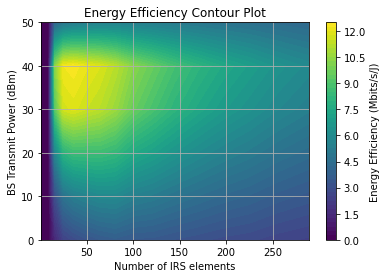

In [18]:
# Extract the values from the dictionary and create a 2D array
energy_efficiency_matrix = np.zeros((len(N_values), len(T)))

for i, n_value in enumerate(N_values):
    for j, transmit_power in enumerate(T):
        energy_efficiency_matrix[i, j] = results_dict_2[transmit_power][i]

# Create a meshgrid for N and T values
N, Pt = np.meshgrid(N_values, T)

# Increase the number of contour levels for smoother appearance
num_levels = 50  # Adjust this number as needed

# Create the contour plot with smooth contours
contour = plt.contourf(N, Pt, energy_efficiency_matrix.T, num_levels, cmap='viridis')
plt.colorbar(contour, label='Energy Efficiency (Mbits/s/J)')

plt.xlabel('Number of IRS elements')
plt.ylabel('BS Transmit Power (dBm)')
plt.title('Energy Efficiency Contour Plot')

plt.grid(True)
plt.show()

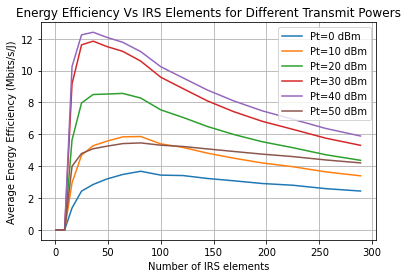

In [19]:
# Plot the graph for each value of T
for TRANSMIT_POWER, average_energy_efficiency_1 in results_dict_2.items():
    plt.plot(N_values, average_energy_efficiency_1, label=f'Pt={TRANSMIT_POWER} dBm')

plt.ylabel('Average Energy Efficiency (Mbits/s/J)')
plt.xlabel('Number of IRS elements')
plt.title('Energy Efficiency Vs IRS Elements for Different Transmit Powers')
plt.legend()
plt.grid(True)
plt.show()

# DOUBLE IRS (PRACTICAL, DISCRETE with B = 3)

In [20]:
# Practical parameters
B = 3
beta_min = 0.2
k = 1.6
phi = 0.43 * np.pi

# Initialize arrays to be used
Ns_max_sqrt = int(np.sqrt(Ns_max))
N_values = np.array([i**2 for i in range(1, Ns_max_sqrt + 1)])
T = np.arange(0, 51, 10) # in dBm

# Initialize an empty dictionary to store the results
results_dict_1 = {}
results_dict_2 = {}

for TRANSMIT_POWER in T:

    # Converting the dBm power to watts for further use
    TRANSMIT_POWER_WATTS = (10**(TRANSMIT_POWER/10))/1000

    average_energy_efficiency_1 = []
    sum_rates_1 = []

    for Ns in N_values:
        nIRSrow = int(np.sqrt(Ns))
        nIRScol = nIRSrow

        irs_coords_1 = generate_irs_coordinates_3D(xs_1, ys_1, zs_1, nIRSrow, nIRScol, halfLambda, quarterLambda)
        loc_S_1 = irs_coords_1
        # print('IRS 1 elements coordinates:'"\n", loc_S_1) 
        # print()

        irs_coords_2 = generate_irs_coordinates_3D(xs_2, ys_2, zs_2, nIRSrow, nIRScol, halfLambda, quarterLambda)
        loc_S_2 = irs_coords_2
        # print('IRS 2 elements coordinates:'"\n", loc_S_2) 
        # print()
        
        dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
        dTU, dSU_2, dTS_2 = calculate_distances_3D(loc_U, loc_T, loc_S_2)
        
        # Reshapiing the distance from antennas/BS to user
        dTU = dTU.reshape(Nt,K)
        # Compute row-wise averages
        dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
        dSU_1 = dSU_1.reshape(1,K)
        # Compute the sum of elements in each row
        dTS_1 = np.mean(dTS_1, axis=1)
        # Compute the average of row sums
        dTS_1 = np.mean(dTS_1)
        # Compute row-wise averages
        dSU_2 = np.mean(dSU_2, axis=1, keepdims=True)
        dSU_2 = dSU_2.reshape(1,K)
        # Compute the sum of elements in each row
        dTS_2 = np.mean(dTS_2, axis=1)
        # Compute the average of row sums
        dTS_2 = np.mean(dTS_2)
        
        # Extract channel values for the current Ns value
        h_rk_ns_values = [h_rk_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, K)
        G_ns_values = [G_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)
        h_rk_2_ns_values = [h_rk_2_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)
        G_ns_2_values = [G_2_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)

        # Initialize list to store individual outage probabilities
        energy_efficiency = []
        
        # Initialize sum-rates for this case
        sum_rate = []
    
        # Perform simulations
        for s in range(NUM_SIMULATIONS):
            h_dk = h_dk_3d[s]  # Shape: (1, K)
            h_rk = h_rk_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose = np.transpose(np.conj(h_rk))  # Shape: (K, Ns)
            G = G_ns_values[s]  # Shape: (Ns, 1)

            h_rk_2 = h_rk_2_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose_2 = np.transpose(np.conj(h_rk_2))  # Shape: (K, Ns)
            G_2 = G_ns_2_values[s]  # Shape: (Ns, 1)
            
            results_array_1 = results_array_sharing_practical(K, Ns, Nt, h_dk*0, h_rk, h_rk_transpose, G, B, beta_min, phi, k)
            results_array_2 = results_array_sharing_practical(K, Ns, Nt, h_dk*0, h_rk_2, h_rk_transpose_2, G_2, B, beta_min, phi, k)
            
            link_inter = []
            
            for i in range(K):
                link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array_1[0][i])/(np.sqrt((dSU_1[0][i])**BETA * (dTS_1)**PATH_LOSS_EXPONENT))) + ((results_array_2[0][i])/(np.sqrt((dSU_2[0][i])**PATH_LOSS_EXPONENT * (dTS_2)**BETA))))
                link_inter.append(link_inter_value)  # Append the computed value to the list
            
            # Convert the list to a numpy array
            link_inter = np.array(np.abs(link_inter))
            link_inter_array = link_inter.reshape(1,K)
            
            # Calculate link_budget using the updated link_inter array
            link_budget = 10 * np.log10((link_inter_array)**2) + 30 
            link_budget = link_budget.reshape(1,K)
            # print(link_budget)
            
            #Calculate the noise value
            # noise = -133 # in dBm
            
            SNR_matrix = []
            
            # Calculate SNR
            for i in range(K):
                SNR = compute_SNR(link_budget[0][i], noise)
                SNR_matrix.append(SNR)
            
            SNR_matrix = np.array(SNR_matrix)
            SNR_matrix = SNR_matrix.reshape(1,K)
            
            # Calculate rate 
            rate_matrix = BW * compute_rate((SNR_matrix))
            rate_matrix_new = rate_matrix.flatten()
            sum_rate_N = np.sum(rate_matrix_new)
            sum_rate.append(sum_rate_N)
            # print(sum_rate_N)
            
            power_1 = compute_power_at_base_station(wn, TRANSMIT_POWER_WATTS, Pb)
            power_21 = compute_power_consumption_at_ris(B, Ns)
            power_22 = compute_power_consumption_at_ris(B, Ns)
            power_3 = (10**(Pu/10))/1000
            power_3 = power_3 * K
            P = power_1 + power_21 + power_22 + power_3

            # Compute the energy_efficiency
            ee = compute_energy_efficiency(sum_rate_N, P)
            energy_efficiency.append(ee/10e6)
    
        # Compute average energy efficiency for the current N
        average_energy_efficiencies_1 = compute_average_energy_efficiency(energy_efficiency)
        average_energy_efficiency_1.append(average_energy_efficiencies_1)
        
        # Append sum-rate for this T to the list
        sum_rates_1.append((np.sum(sum_rate)/NUM_SIMULATIONS))
        
    # Store the results in the dictionary with N as the key
    results_dict_1[TRANSMIT_POWER] = sum_rates_1
    
    # Store the results in the dictionary with N as the key
    results_dict_2[TRANSMIT_POWER] = average_energy_efficiency_1

print('done')
print(N_values)

C:\Users\NR\AppData\Local\Temp\ipykernel_23976\540932647.py:95: RuntimeWarning: divide by zero encountered in log10
  link_budget = 10 * np.log10((link_inter_array)**2) + 30


done
[  1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289]


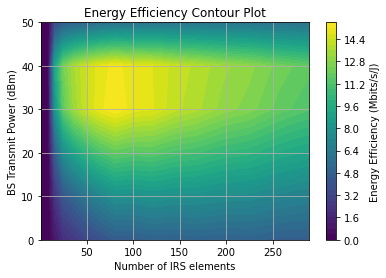

In [21]:
# Extract the values from the dictionary and create a 2D array
energy_efficiency_matrix = np.zeros((len(N_values), len(T)))

for i, n_value in enumerate(N_values):
    for j, transmit_power in enumerate(T):
        energy_efficiency_matrix[i, j] = results_dict_2[transmit_power][i]

# Create a meshgrid for N and T values
N, Pt = np.meshgrid(N_values, T)

# Increase the number of contour levels for smoother appearance
num_levels = 50  # Adjust this number as needed

# Create the contour plot with smooth contours
contour = plt.contourf(N, Pt, energy_efficiency_matrix.T, num_levels, cmap='viridis')
plt.colorbar(contour, label='Energy Efficiency (Mbits/s/J)')

plt.xlabel('Number of IRS elements')
plt.ylabel('BS Transmit Power (dBm)')
plt.title('Energy Efficiency Contour Plot')

plt.grid(True)
plt.show()

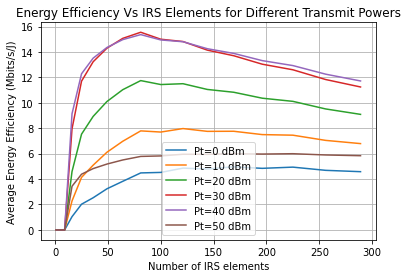

In [22]:
# Plot the graph for each value of T
for TRANSMIT_POWER, average_energy_efficiency_1 in results_dict_2.items():
    plt.plot(N_values, average_energy_efficiency_1, label=f'Pt={TRANSMIT_POWER} dBm')

plt.ylabel('Average Energy Efficiency (Mbits/s/J)')
plt.xlabel('Number of IRS elements')
plt.title('Energy Efficiency Vs IRS Elements for Different Transmit Powers')
plt.legend()
plt.grid(True)
plt.show()

# SINGLE IRS (IDEAL, CONTINUOUS)

In [23]:
B = None
# Initialize arrays to be used
Ns_max_sqrt = int(np.sqrt(Ns_max))
N_values = np.array([i**2 for i in range(1, Ns_max_sqrt + 1)])
T = np.arange(0, 51, 10) # in dBm

# Initialize an empty dictionary to store the results
results_dict_1 = {}
results_dict_2 = {}

for TRANSMIT_POWER in T:

    # Converting the dBm power to watts for further use
    TRANSMIT_POWER_WATTS = (10**(TRANSMIT_POWER/10))/1000

    average_energy_efficiency_1 = []
    sum_rates_1 = []

    for Ns in N_values:
        nIRSrow = int(np.sqrt(Ns))
        nIRScol = nIRSrow

        irs_coords_1 = generate_irs_coordinates_3D(xs_1, ys_1, zs_1, nIRSrow, nIRScol, halfLambda, quarterLambda)
        loc_S_1 = irs_coords_1
        # print('IRS 1 elements coordinates:'"\n", loc_S_1) 
        # print()
        
        dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
        
        # Reshapiing the distance from antennas/BS to user
        dTU = dTU.reshape(Nt,K)
        # Compute row-wise averages
        dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
        dSU_1 = dSU_1.reshape(1,K)
        # Compute the sum of elements in each row
        dTS_1 = np.mean(dTS_1, axis=1)
        # Compute the average of row sums
        dTS_1 = np.mean(dTS_1)
        
        # Extract channel values for the current Ns value
        h_rk_ns_values = [h_rk_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, K)
        G_ns_values = [G_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)

        # Initialize list to store individual outage probabilities
        energy_efficiency = []
        
        # Initialize sum-rates for this case
        sum_rate = []
    
        # Perform simulations
        for s in range(NUM_SIMULATIONS):
            h_dk = h_dk_3d[s]  # Shape: (1, K)
            h_rk = h_rk_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose = np.transpose(np.conj(h_rk))  # Shape: (K, Ns)
            G = G_ns_values[s]  # Shape: (Ns, 1)
            
            results_array = results_array_sharing_ideal(K, Ns, Nt, h_dk*0, h_rk, h_rk_transpose, G)
            
            link_inter = []
            
            for i in range(K):
                link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array[0][i])/(np.sqrt((dSU_1[0][i])**BETA * (dTS_1)**PATH_LOSS_EXPONENT))))
                link_inter.append(link_inter_value)  # Append the computed value to the list
            
            # Convert the list to a numpy array
            link_inter = np.array(np.abs(link_inter))
            link_inter_array = link_inter.reshape(1,K)
            
            # Calculate link_budget using the updated link_inter array
            link_budget = 10 * np.log10((link_inter_array)**2) + 30 
            link_budget = link_budget.reshape(1,K)
            # print(link_budget)
            
            #Calculate the noise value
            # noise = -133 # in dBm
            
            SNR_matrix = []
            
            # Calculate SNR
            for i in range(K):
                SNR = compute_SNR(link_budget[0][i], noise)
                SNR_matrix.append(SNR)
            
            SNR_matrix = np.array(SNR_matrix)
            SNR_matrix = SNR_matrix.reshape(1,K)
            
            # Calculate rate 
            rate_matrix = BW * compute_rate((SNR_matrix))
            rate_matrix_new = rate_matrix.flatten()
            sum_rate_N = np.sum(rate_matrix_new)
            sum_rate.append(sum_rate_N)
            # print(sum_rate_N)
            
            power_1 = compute_power_at_base_station(wn, TRANSMIT_POWER_WATTS, Pb)
            power_2 = compute_power_consumption_at_ris(B, Ns)
            power_3 = (10**(Pu/10))/1000
            power_3 = power_3 * K
            P = power_1 + power_2 + power_3

            # Compute the energy_efficiency
            ee = compute_energy_efficiency(sum_rate_N, P)
            energy_efficiency.append(ee/10e6)
    
        # Compute average energy efficiency for the current N
        average_energy_efficiencies_1 = compute_average_energy_efficiency(energy_efficiency)
        average_energy_efficiency_1.append(average_energy_efficiencies_1)
        
        # Append sum-rate for this T to the list
        sum_rates_1.append((np.sum(sum_rate)/NUM_SIMULATIONS))
        
    # Store the results in the dictionary with N as the key
    results_dict_1[TRANSMIT_POWER] = sum_rates_1
    
    # Store the results in the dictionary with N as the key
    results_dict_2[TRANSMIT_POWER] = average_energy_efficiency_1

print('done')
print(N_values)

C:\Users\NR\AppData\Local\Temp\ipykernel_23976\792345337.py:70: RuntimeWarning: divide by zero encountered in log10
  link_budget = 10 * np.log10((link_inter_array)**2) + 30


done
[  1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289]


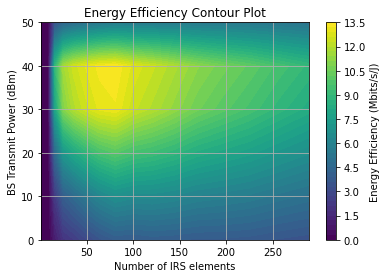

In [24]:
# Extract the values from the dictionary and create a 2D array
energy_efficiency_matrix = np.zeros((len(N_values), len(T)))

for i, n_value in enumerate(N_values):
    for j, transmit_power in enumerate(T):
        energy_efficiency_matrix[i, j] = results_dict_2[transmit_power][i]

# Create a meshgrid for N and T values
N, Pt = np.meshgrid(N_values, T)

# Increase the number of contour levels for smoother appearance
num_levels = 50  # Adjust this number as needed

# Create the contour plot with smooth contours
contour = plt.contourf(N, Pt, energy_efficiency_matrix.T, num_levels, cmap='viridis')
plt.colorbar(contour, label='Energy Efficiency (Mbits/s/J)')

plt.xlabel('Number of IRS elements')
plt.ylabel('BS Transmit Power (dBm)')
plt.title('Energy Efficiency Contour Plot')

plt.grid(True)
plt.show()

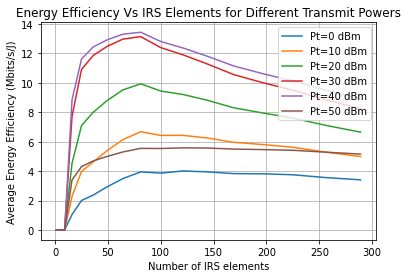

In [25]:
# Plot the graph for each value of T
for TRANSMIT_POWER, average_energy_efficiency_1 in results_dict_2.items():
    plt.plot(N_values, average_energy_efficiency_1, label=f'Pt={TRANSMIT_POWER} dBm')

plt.ylabel('Average Energy Efficiency (Mbits/s/J)')
plt.xlabel('Number of IRS elements')
plt.title('Energy Efficiency Vs IRS Elements for Different Transmit Powers')
plt.legend()
plt.grid(True)
plt.show()

# SINGLE IRS (PRACTICAL, DISCRETE with B=3)

In [26]:
B = 3 # Quantization bit
beta_min = 0.2
k = 1.6
phi = 0.43 * np.pi

# Initialize an empty dictionary to store the results
results_dict_1 = {}
results_dict_2 = {}

for TRANSMIT_POWER in T:

    # Converting the dBm power to watts for further use
    TRANSMIT_POWER_WATTS = (10**(TRANSMIT_POWER/10))/1000

    average_energy_efficiency_1 = []
    sum_rates_1 = []

    for Ns in N_values:
        nIRSrow = int(np.sqrt(Ns))
        nIRScol = nIRSrow

        irs_coords_1 = generate_irs_coordinates_3D(xs_1, ys_1, zs_1, nIRSrow, nIRScol, halfLambda, quarterLambda)
        loc_S_1 = irs_coords_1
        # print('IRS 1 elements coordinates:'"\n", loc_S_1) 
        # print()
        
        dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
        
        # Reshapiing the distance from antennas/BS to user
        dTU = dTU.reshape(Nt,K)
        # Compute row-wise averages
        dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
        dSU_1 = dSU_1.reshape(1,K)
        # Compute the sum of elements in each row
        dTS_1 = np.mean(dTS_1, axis=1)
        # Compute the average of row sums
        dTS_1 = np.mean(dTS_1)
        
        # Extract channel values for the current Ns value
        h_rk_ns_values = [h_rk_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, K)
        G_ns_values = [G_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)

        # Initialize list to store individual outage probabilities
        energy_efficiency = []
        
        # Initialize sum-rates for this case
        sum_rate = []
    
        # Perform simulations
        for s in range(NUM_SIMULATIONS):
            h_dk = h_dk_3d[s]  # Shape: (1, K)
            h_rk = h_rk_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose = np.transpose(np.conj(h_rk))  # Shape: (K, Ns)
            G = G_ns_values[s]  # Shape: (Ns, 1)
            
            results_array = results_array_sharing_practical(K, Ns, Nt, h_dk*0, h_rk, h_rk_transpose, G, B, beta_min, phi, k)
            
            link_inter = []
            
            for i in range(K):
                link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array[0][i])/(np.sqrt((dSU_1[0][i])**BETA * (dTS_1)**PATH_LOSS_EXPONENT))))
                link_inter.append(link_inter_value)  # Append the computed value to the list
            
            # Convert the list to a numpy array
            link_inter = np.array(np.abs(link_inter))
            link_inter_array = link_inter.reshape(1,K)
            
            # Calculate link_budget using the updated link_inter array
            link_budget = 10 * np.log10((link_inter_array)**2) + 30 
            link_budget = link_budget.reshape(1,K)
            # print(link_budget)
            
            #Calculate the noise value
            # noise = -133 # in dBm
            
            SNR_matrix = []
            
            # Calculate SNR
            for i in range(K):
                SNR = compute_SNR(link_budget[0][i], noise)
                SNR_matrix.append(SNR)
            
            SNR_matrix = np.array(SNR_matrix)
            SNR_matrix = SNR_matrix.reshape(1,K)
            
            # Calculate rate 
            rate_matrix = BW * compute_rate((SNR_matrix))
            rate_matrix_new = rate_matrix.flatten()
            sum_rate_N = np.sum(rate_matrix_new)
            sum_rate.append(sum_rate_N)
            # print(sum_rate_N)
            
            power_1 = compute_power_at_base_station(wn, TRANSMIT_POWER_WATTS, Pb)
            power_2 = compute_power_consumption_at_ris(B, Ns)
            power_3 = (10**(Pu/10))/1000
            power_3 = power_3 * K
            P = power_1 + power_2 + power_3

            # Compute the energy_efficiency
            ee = compute_energy_efficiency(sum_rate_N, P)
            energy_efficiency.append(ee/10e6)
    
        # Compute average energy efficiency for the current N
        average_energy_efficiencies_1 = compute_average_energy_efficiency(energy_efficiency)
        average_energy_efficiency_1.append(average_energy_efficiencies_1)
        
        # Append sum-rate for this T to the list
        sum_rates_1.append((np.sum(sum_rate)/NUM_SIMULATIONS))
        
    # Store the results in the dictionary with N as the key
    results_dict_1[TRANSMIT_POWER] = sum_rates_1
    
    # Store the results in the dictionary with N as the key
    results_dict_2[TRANSMIT_POWER] = average_energy_efficiency_1

print('done')
print(N_values)

C:\Users\NR\AppData\Local\Temp\ipykernel_23976\1582642240.py:69: RuntimeWarning: divide by zero encountered in log10
  link_budget = 10 * np.log10((link_inter_array)**2) + 30


done
[  1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289]


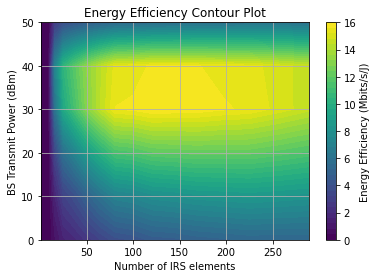

In [27]:
# Extract the values from the dictionary and create a 2D array
energy_efficiency_matrix = np.zeros((len(N_values), len(T)))

for i, n_value in enumerate(N_values):
    for j, transmit_power in enumerate(T):
        energy_efficiency_matrix[i, j] = results_dict_2[transmit_power][i]

# Create a meshgrid for N and T values
N, Pt = np.meshgrid(N_values, T)

# Increase the number of contour levels for smoother appearance
num_levels = 40 # Adjust this number as needed

# Create the contour plot with smooth contours
contour = plt.contourf(N, Pt, energy_efficiency_matrix.T, num_levels, cmap='viridis')
plt.colorbar(contour, label='Energy Efficiency (Mbits/s/J)')

plt.xlabel('Number of IRS elements')
plt.ylabel('BS Transmit Power (dBm)')
plt.title('Energy Efficiency Contour Plot')

plt.grid(True)
plt.show()

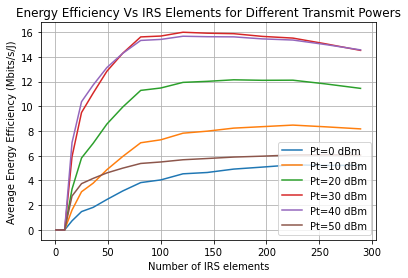

In [28]:
# Plot the graph for each value of T
for TRANSMIT_POWER, average_energy_efficiency_1 in results_dict_2.items():
    plt.plot(N_values, average_energy_efficiency_1, label=f'Pt={TRANSMIT_POWER} dBm')

plt.ylabel('Average Energy Efficiency (Mbits/s/J)')
plt.xlabel('Number of IRS elements')
plt.title('Energy Efficiency Vs IRS Elements for Different Transmit Powers')
plt.legend()
plt.grid(True)
plt.show()